In [1]:
import os

import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

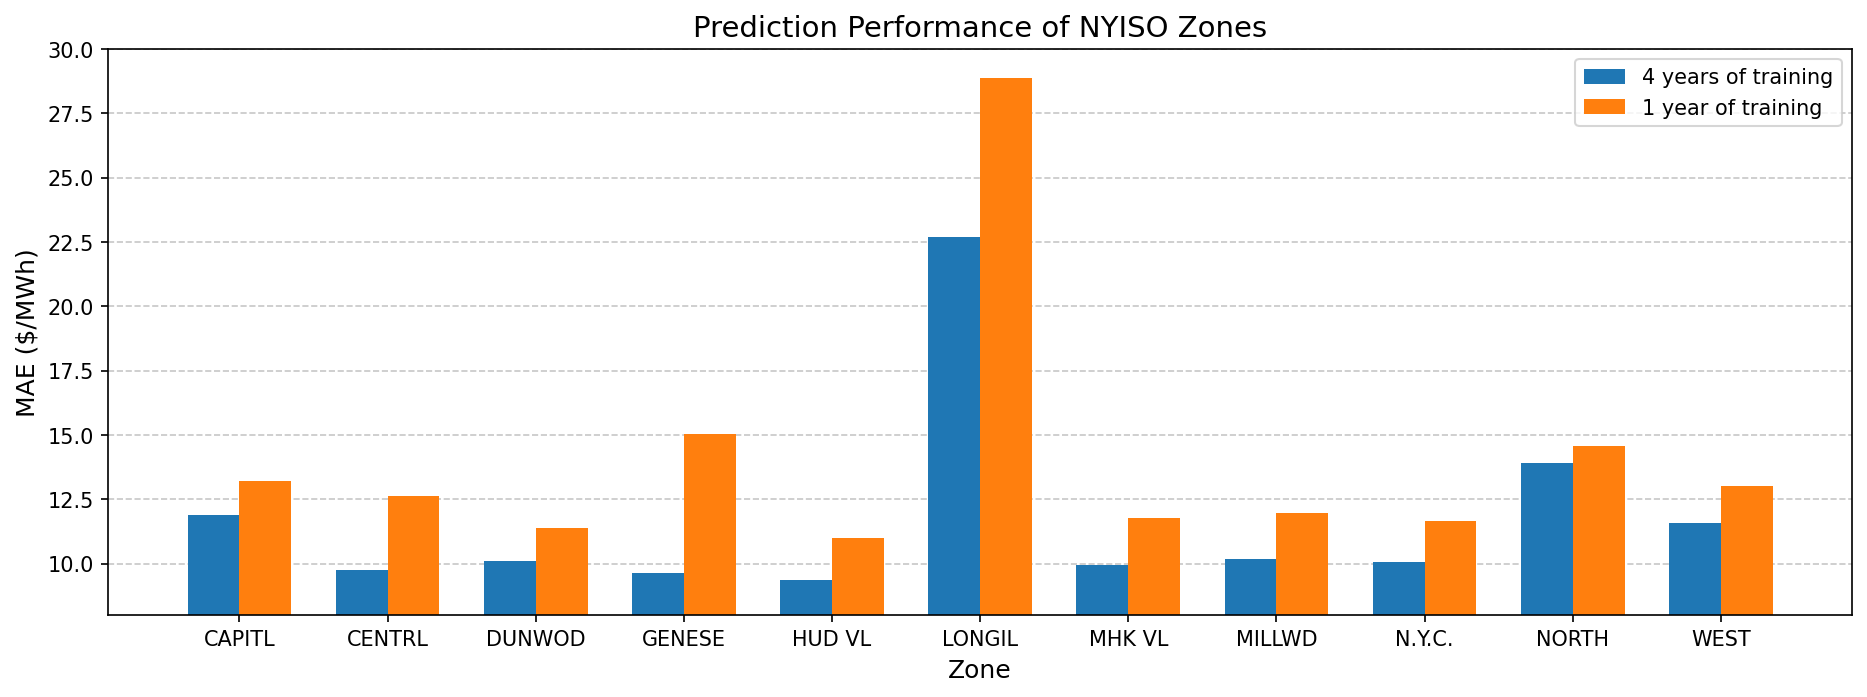

In [11]:
data = {
    'zone': ['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'HUD VL', 'LONGIL', 'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH', 'WEST'],
    '4 years': [11.90, 9.75, 10.10, 9.63, 9.35, 22.68, 9.94, 10.17, 10.08, 13.91, 11.58],
    '1 year': [13.22, 12.63, 11.38, 15.02, 10.99, 28.87, 11.77, 11.98, 11.64, 14.55, 13.03]
}

df = pd.DataFrame(data)
plt.figure(figsize=(15, 5), dpi=150)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)  
plt.gca().set_axisbelow(True)
bar_width = 0.35
bar_positions = range(len(df['zone']))
plt.bar(bar_positions, df['4 years'], width=bar_width, label='4 years of training')
plt.bar([pos + bar_width for pos in bar_positions], df['1 year'], width=bar_width, label='1 year of training')
plt.xlabel('Zone', fontsize=12)
plt.ylabel('MAE ($/MWh)', fontsize=12)
plt.title('Prediction Performance of NYISO Zones', fontsize=14)
plt.xticks([pos + bar_width / 2 for pos in bar_positions], df['zone'])
plt.ylim(8, 30)
plt.legend()
plt.savefig("figures/zones_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

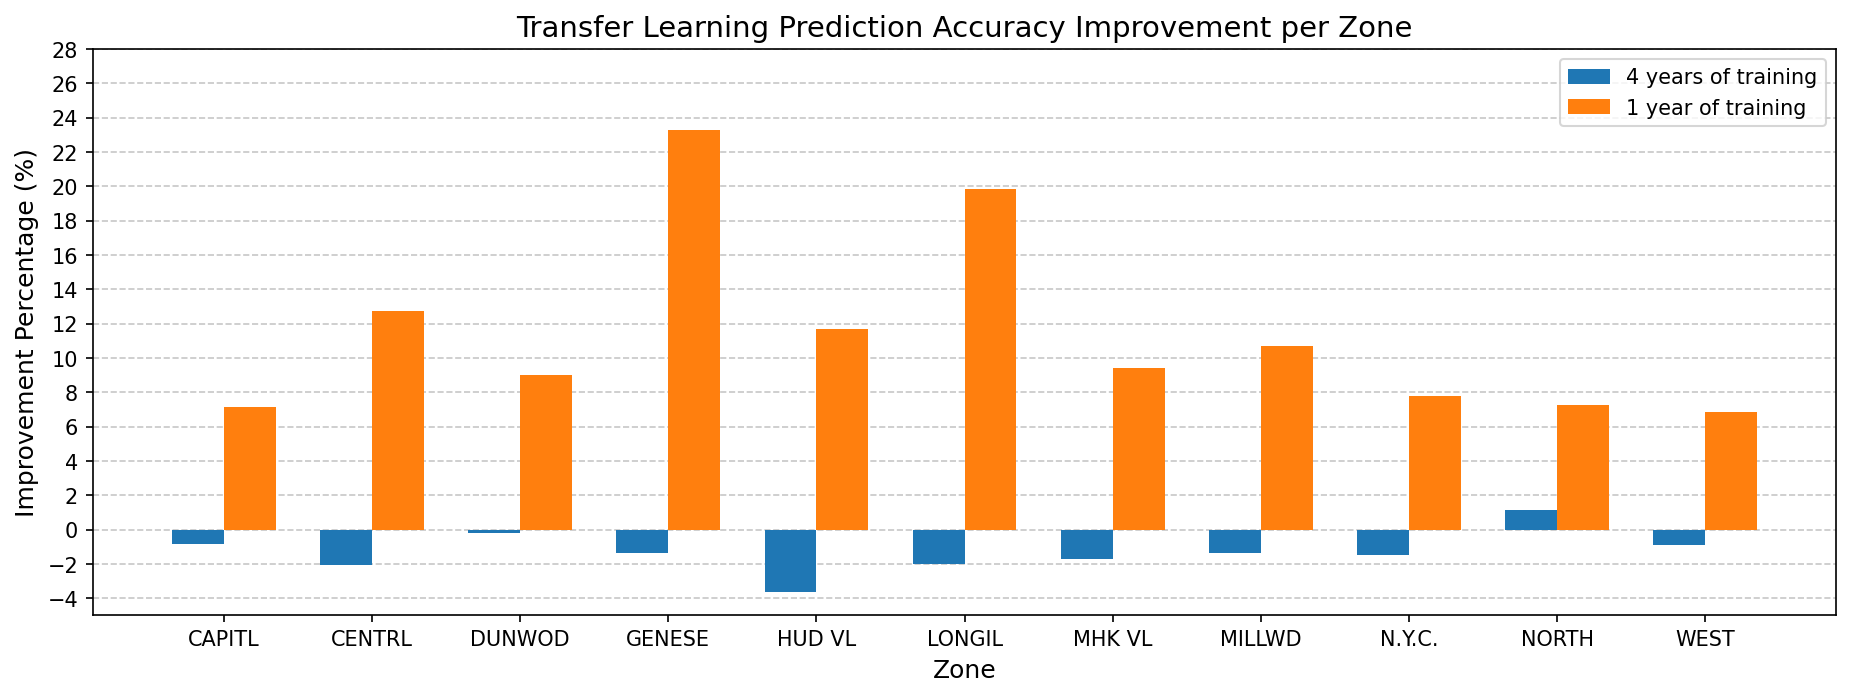

In [15]:
data = {
    'zone': ['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'HUD VL', 'LONGIL', 'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH', 'WEST'],
    '4 years': [-0.86, -2.06, -0.20, -1.36, -3.63, -2.02, -1.68, -1.38, -1.46, 1.15, -0.90],
    '1 year': [7.13, 12.74, 9.02, 23.27, 11.71, 19.81, 9.44, 10.67, 7.80, 7.27, 6.87]
}

df = pd.DataFrame(data)
plt.figure(figsize=(15, 5), dpi=150)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)  
plt.gca().set_axisbelow(True)
bar_width = 0.35
bar_positions = range(len(df['zone']))
plt.bar(bar_positions, df['4 years'], width=bar_width, label='4 years of training')
plt.bar([pos + bar_width for pos in bar_positions], df['1 year'], width=bar_width, label='1 year of training')
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Improvement Percentage (%)', fontsize=12)
plt.title('Transfer Learning Prediction Accuracy Improvement per Zone', fontsize=14)
plt.xticks([pos + bar_width / 2 for pos in bar_positions], df['zone'])
plt.yticks(range(-4, 30, 2))
plt.legend()
plt.savefig("figures/tl_zones_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

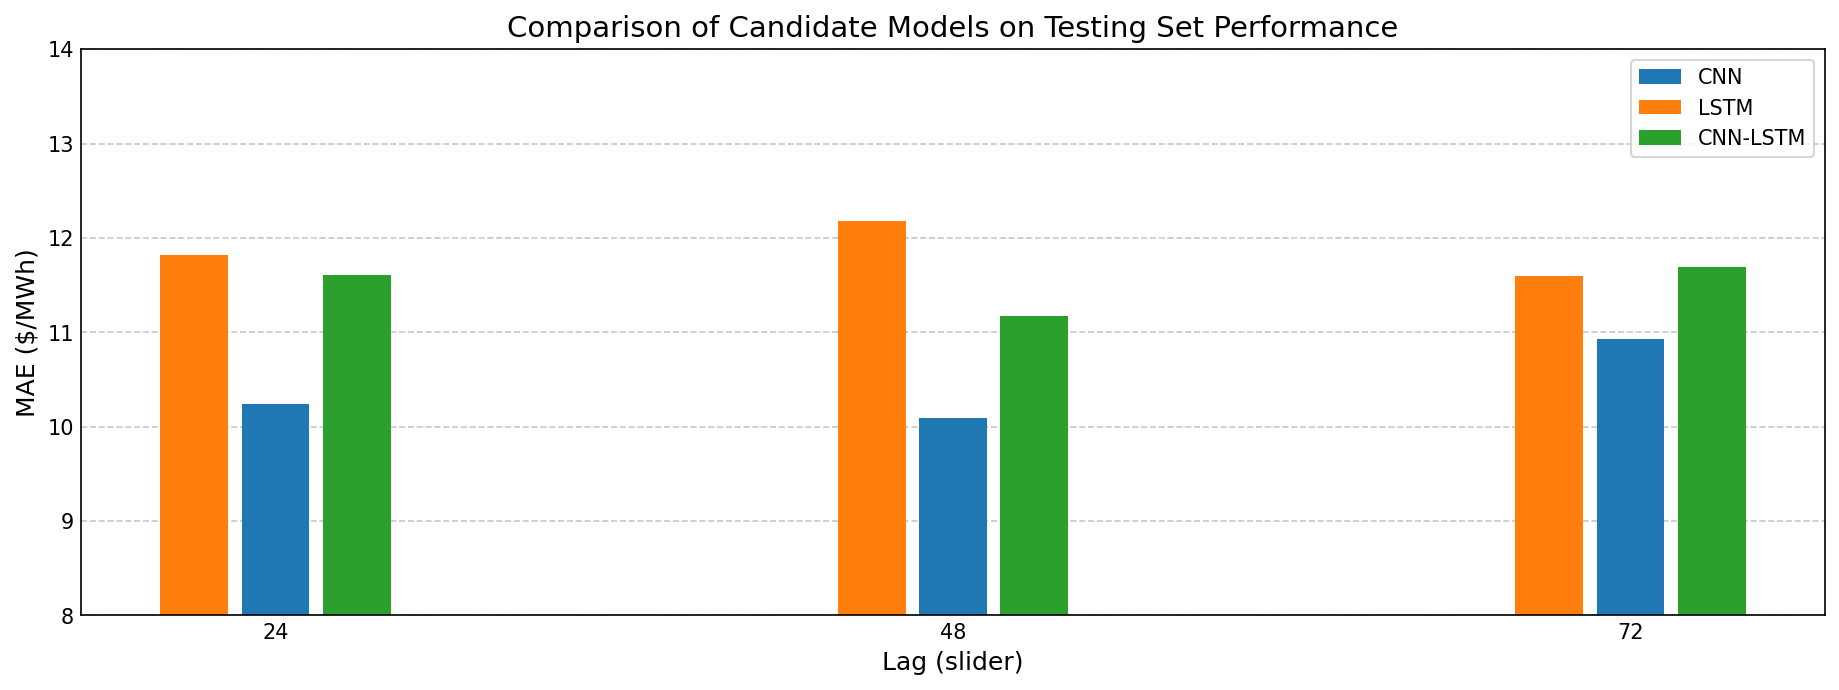

In [31]:
lag_time_steps = [24, 48, 72]
lstm_values = [11.8169, 12.1817, 11.5954]
cnn_values = [10.2440, 10.0895, 10.9328]
cnn_lstm_values = [11.6092, 11.1771, 11.6884]
bar_width = 0.1
bar_positions_lstm = np.arange(len(lag_time_steps)) 
bar_positions_cnn = bar_positions_lstm + bar_width + 0.02
bar_positions_cnn_lstm = bar_positions_cnn + bar_width + 0.02

plt.figure(figsize=(15, 5), dpi=150)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)  
plt.gca().set_axisbelow(True)

plt.bar(bar_positions_cnn, cnn_values, width=bar_width, label='CNN')
plt.bar(bar_positions_lstm, lstm_values, width=bar_width, label='LSTM')
plt.bar(bar_positions_cnn_lstm, cnn_lstm_values, width=bar_width, label='CNN-LSTM')

plt.xlabel('Lag (slider)', fontsize=12)
plt.ylabel('MAE ($/MWh)', fontsize=12)
plt.title('Comparison of Candidate Models on Testing Set Performance', fontsize=14)

plt.xticks(bar_positions_cnn, lag_time_steps)
plt.tick_params(axis='both', which='both', length=0)  
plt.ylim(8, 14)
plt.legend()
plt.savefig("figures/comparison_testing_rescaled_mae.pdf", format="pdf", bbox_inches="tight")

plt.show()